In [1]:
#패키지 import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#데이터읽기
df = pd.read_csv("health_data.csv")

# 데이터 전처리

In [3]:
#데이터 확인
df.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [4]:
#데이터 정보 확인
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [5]:
#의미없는 칼럼 삭제
df = df.drop(['기준년도', '가입자일련번호', '데이터공개일자'], axis=1)

In [6]:
#데이터
df.describe()

,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9912.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,1.045200,124.669693,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,0.218545,14.629865,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,115.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,124.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,1.000000,134.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,3.000000,200.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


In [7]:
# 결측치 개수 확인
df.isnull().sum()

시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
dtype: int64

<AxesSubplot:>

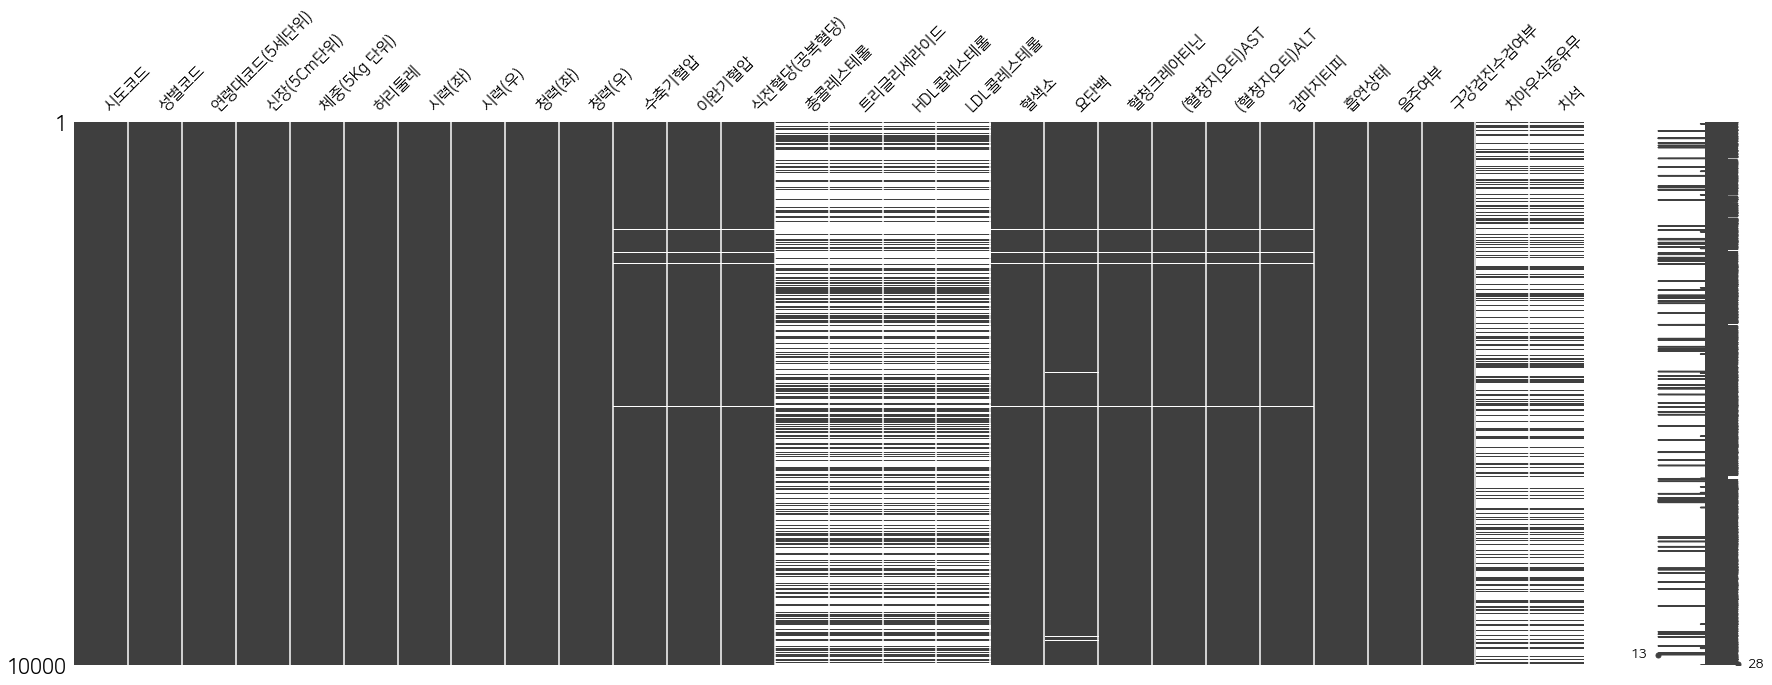

In [8]:
#결측치 시각화
import missingno as msno
import matplotlib as mat
#한글폰트 나눔스퀘어 지정
mat.rcParams['font.family'] = 'NanumSquare'

msno.matrix(df, figsize=(30,10))

In [9]:
#칼럼별 결측치 비율 확인
for col in df.columns:
    na = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(na)

column:       시도코드	 Percent of NaN value: 0.00%
column:       성별코드	 Percent of NaN value: 0.00%
column: 연령대코드(5세단위)	 Percent of NaN value: 0.00%
column:  신장(5Cm단위)	 Percent of NaN value: 0.00%
column: 체중(5Kg 단위)	 Percent of NaN value: 0.00%
column:       허리둘레	 Percent of NaN value: 0.00%
column:      시력(좌)	 Percent of NaN value: 0.00%
column:      시력(우)	 Percent of NaN value: 0.00%
column:      청력(좌)	 Percent of NaN value: 0.00%
column:      청력(우)	 Percent of NaN value: 0.00%
column:      수축기혈압	 Percent of NaN value: 0.88%
column:      이완기혈압	 Percent of NaN value: 0.88%
column: 식전혈당(공복혈당)	 Percent of NaN value: 0.88%
column:     총콜레스테롤	 Percent of NaN value: 59.56%
column:   트리글리세라이드	 Percent of NaN value: 59.56%
column:   HDL콜레스테롤	 Percent of NaN value: 59.56%
column:   LDL콜레스테롤	 Percent of NaN value: 60.23%
column:        혈색소	 Percent of NaN value: 0.88%
column:        요단백	 Percent of NaN value: 1.39%
column:    혈청크레아티닌	 Percent of NaN value: 0.88%
column: (혈청지오티)AST	 Percent of NaN 

In [10]:
#결측치 비율 50%이상 칼럼 삭제
df3 = df.drop(['총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '치아우식증유무', '치석'], axis=1)

In [11]:
#칼럼 감소 확인
df3.head()

,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부
0,36,M,9,165,60,72.1,1.2,1.5,1,1,...,90.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No,0
1,27,F,13,150,65,81.0,0.8,0.8,1,1,...,87.0,12.7,1.0,0.5,18.0,15.0,15.0,No,No,0
2,11,F,12,155,55,70.0,0.6,0.7,1,1,...,102.0,12.8,1.0,0.7,27.0,25.0,7.0,No,No,0
3,31,M,13,160,70,90.8,1.0,1.0,1,2,...,146.0,16.4,1.0,1.2,65.0,97.0,72.0,No,No,1
4,41,F,12,155,50,75.2,1.5,1.2,1,1,...,110.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No,0


In [12]:
#결측치 존재 행 전체 삭제 (칼럼별 결측치 비율1%미만)
df4 = df3.dropna(axis=0)

In [13]:
#결측치 확인
df4.isnull().sum()

시도코드           0
성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
dtype: int64

In [14]:
#전처리 데이터 크기 확인
df4.shape

(9858, 22)

In [15]:
#'실명 데이터 값 변경 9.9 -> 0'
df4 = df4.replace({'시력(좌)':9.9}, -1)
df4 = df4.replace({'시력(우)':9.9}, -1)

# 데이터 분포 확인

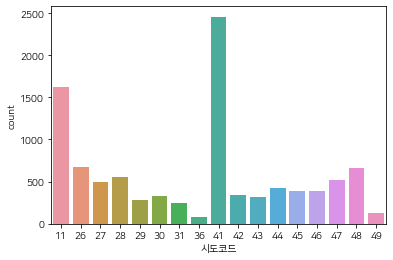

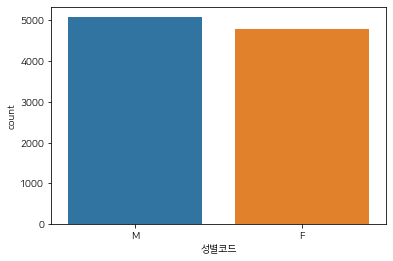

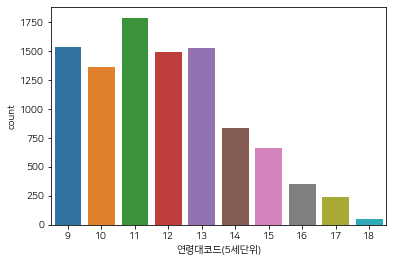

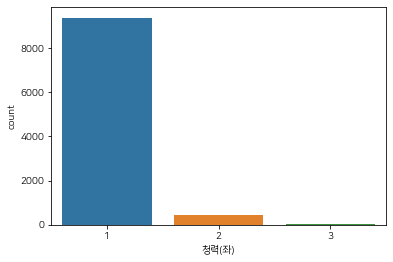

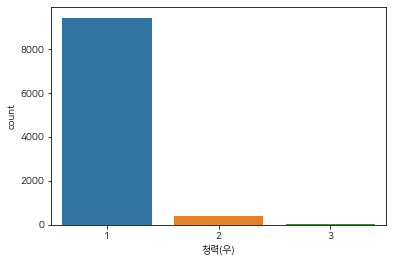

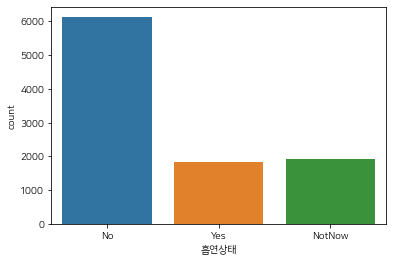

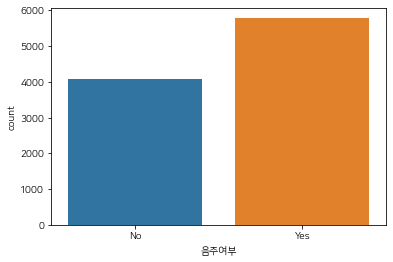

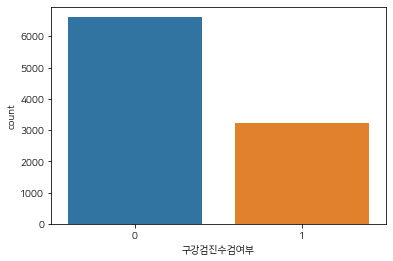

In [16]:
#범주형 데이터 분포 확인
df_o = ['시도코드', '성별코드', '연령대코드(5세단위)', '청력(좌)', '청력(우)', '흡연상태', '음주여부', '구강검진수검여부']
for col in df_o:
    sns.countplot(x=col,data=df4)
    plt.show()

1. 지역<br>
41-경기도, 11-서울특별시, 26-부산광역시.... <br>
일반적인 인구분포와 일치함 <br>
<br>
2. 성별<br>
남성이 여성보다 조금 많음<br>
<br>
3. 나이<br>
건강검진 데이터이기 때문에, 40세 이상만 존재 <br>
40~ 50대가 가장 많고 연령이 높아질수록 적어짐 <br>
<br>
4. 청력 좌,우 <br>
좌, 우 모두 대부분 정상 <br>
<br>
5. 흡연상태 <br>
No가 가장많고, yes와 not now가 비슷함 <br>
즉, 과거에 피웠던 사람 중 절반이 지금은 금연하고 있음<br>
<br>
6. 음주여부<br>
yes가 no보다 많음<br>
<br>
7. 구강검진수검여부<br>
미수검(0)이 수검(1)보다 많음<br>

In [17]:
# 수치형 데이터 분포 확인
df_n = list(set(df4.columns) - set(df_o))
df_n = ['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레',
        '시력(좌)','시력(우)',
        '혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피',
        '이완기혈압', '수축기혈압',
        '혈색소','요단백','식전혈당(공복혈당)']

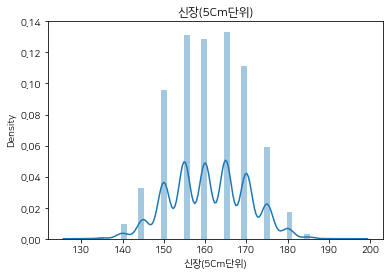

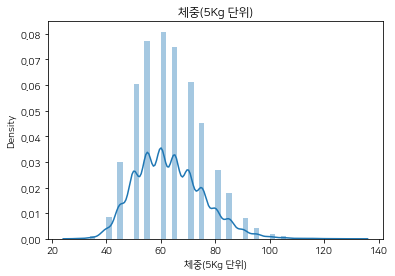

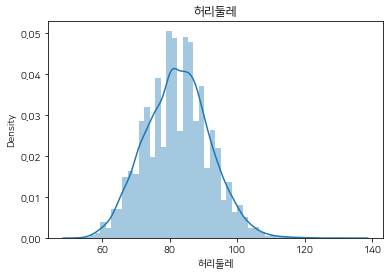

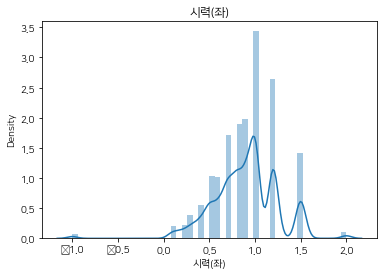

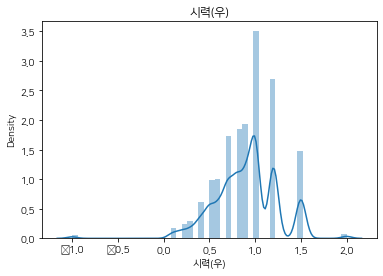

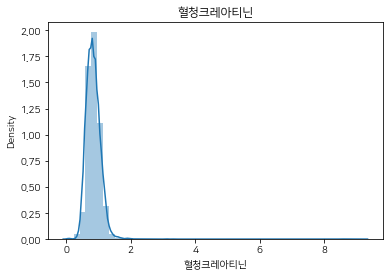

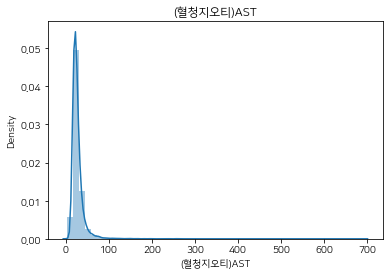

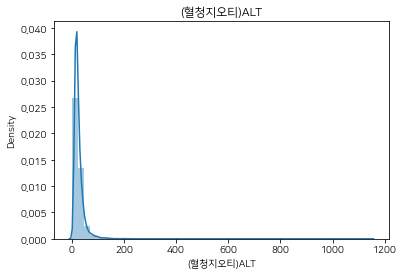

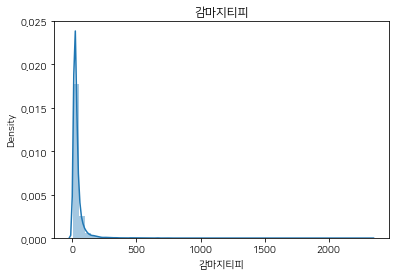

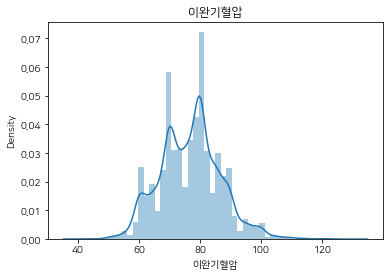

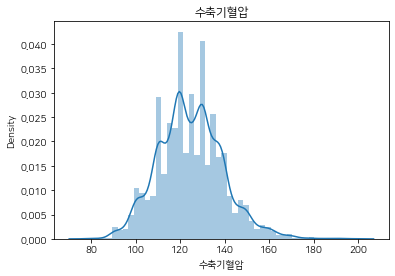

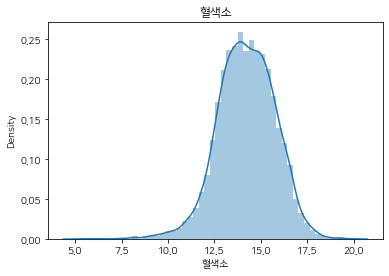

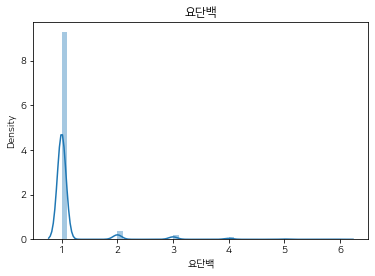

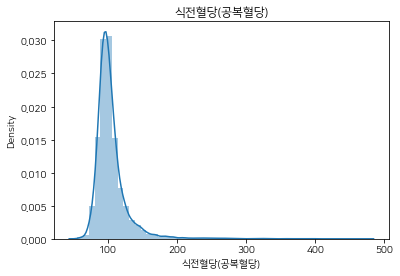

In [18]:
for col in df_n:
    sns.distplot(df4.loc[df4[col].notnull(), col])
    plt.title(col)
    plt.show()

1. 신장 <br>
5cm단위 범주로 처리, 정규분포와 유사하게 형태를 띰 <br>
 <br>
2. 체중 <br>
5kg단위 범주로 처리, 정규분포와 유사하게 형태를 띰 <br>
 <br>
 2. 허리둘레<br>
대부분 60~100사이에 분포, 정규분포와 유사하게 형태를 띰 <br>
<br>
3. 시력 <br>
좌, 우 모두 1을 기준으로 대칭으로 분포, 정규분포와 유사하게 형태를 띰 <br>
<br>
4. 청력 좌,우 <br>
좌, 우 모두 대부분 정상 <br>
<br>
5. 혈청크레아티닌<br>
대부분 0~2 사이에 분포 <br>
<br>
6. 혈청지오티 AST<br>
대부분 0~100 사이에 분포 <br>
<br>
7. 혈청지오티 ALT<br>
대부분 0~200 사이에 분포 <br>
<br>
8. 감마지티피 <br>
대부분 0~500 사이에 분포 <br>
<br>
9. 이완기혈압 <br>
대부분 60~100 사이에 분포, 정규분포와 유사하게 형태를 띰 <br>
<br>
10. 수축기혈압 <br>
대부분 100~160 사이에 분포, 정규분포와 유사하게 형태를 띰 <br>
<br>
11. 혈색소 <br>
대부분 10~17.5 사이에 분포, 정규분포와 가장 유사하게 형태를 띰 <br>
<br>
12. 요단백 <br>
대부분 1값을 가짐 <br>
<br>
13. 공복혈당 <br>
100을 기준으로 대칭으로 분포, 정규분포와 유사하게 형태를 띰 <br>
<br>

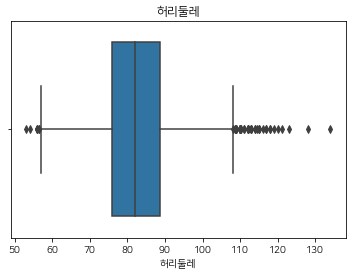

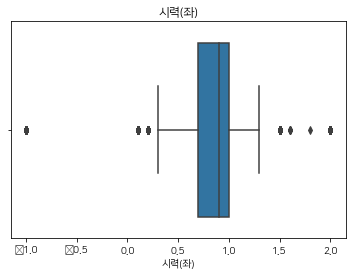

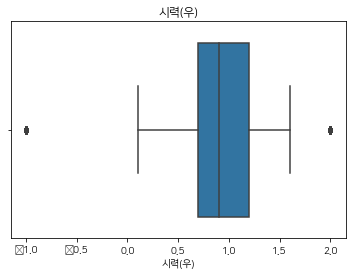

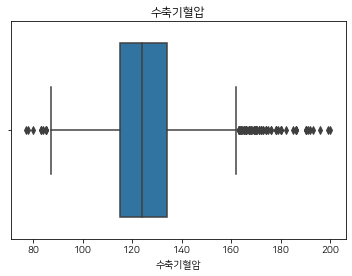

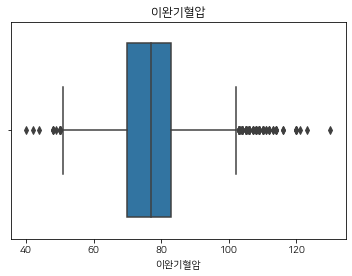

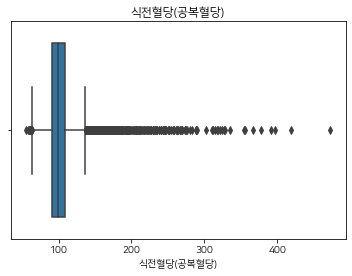

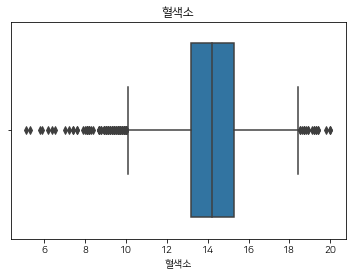

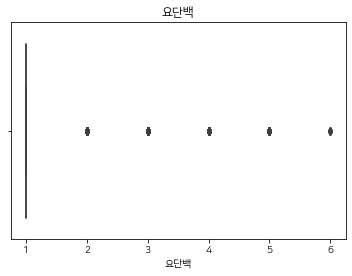

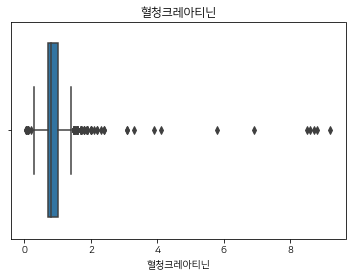

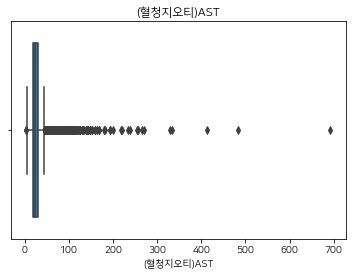

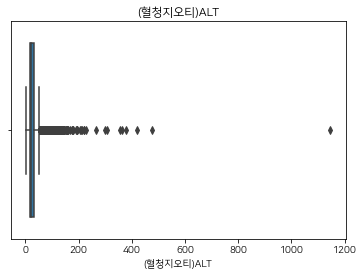

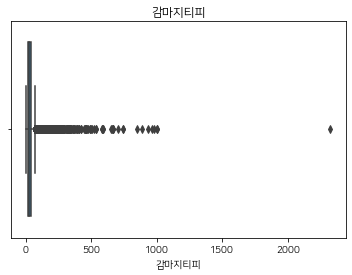

In [19]:
# float 데이터 이상치 분포 확인
df_nn = [ col for col in df4.columns if df4[col].dtypes == "float"]
for col in df_nn:
    sns.boxplot(df4.loc[df4[col].notnull(), col])
    plt.title(col)
    plt.show()

전체적으로 모두 이상치가 존재하지만, <br>
식전혈당, 혈청크레아티닌, AST, ALT, 감마지티피가 이상치 비율이 높은것으로 확인

# 데이터 시각화
### 성별분포
기본적으로 유사한 항목들을 pairplot으로 성별 분포를 보고자 함 <br>

In [ ]:
# 기본 신체 정보 (키, 체중, 허리둘레)
sns.pairplot(df4, size=3, hue='성별코드', vars = ['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레'])
plt.show()

남성이 여성보다 신장, 체중이 모두 크기 때문에, <br>
실제 데이터에서도 남성이 여성보다 큰 값을 가지는 것으로 확인

In [ ]:
# 시력
sns.pairplot(df4, size=3, hue='성별코드', 
             vars = ['시력(좌)', '시력(우)'])
plt.show()

여성과 남성간의 큰 차이는 없음 <br>
대부분 좌,우 시력의 차이가 없이 비슷한 값을 가지지만 <br>
한쪽눈만 실명된 경우도 좌, 우 모두 존재함

In [ ]:
#혈압
sns.pairplot(df4, size=3, plot_kws={'alpha':0.7}, hue='성별코드', 
             vars = ['수축기혈압', '이완기혈압'])
plt.show()

여성과 남성간의 큰 차이는 없음 <br>

In [ ]:
# 혈청, 효소
sns.pairplot(df4, size=3, plot_kws={'alpha':0.7}, hue='성별코드', 
             vars = ['혈청크레아티닌', '(혈청지오티)AST', '감마지티피', '(혈청지오티)ALT'])
plt.show()

혈청데이터와 감마 데이터 간의 분포를 보려고 했으나, <br>
각 데이터들의 이상치가 너무 큰 영향을 미치고 있어 자세히 들여다 보기 어려움

In [ ]:
# 혈청, 효소 이상치 제거 후 시각화
cut=['혈청크레아티닌', '(혈청지오티)AST', '감마지티피', '(혈청지오티)ALT']
for col in cut:
    #구간설정
    q1=df4[col].quantile(0.25)
    q2=df4[col].quantile(0.5)
    q3=df4[col].quantile(0.75)
    iqr=q3-q1
    #이상치검색
    C=df4[col]>q3+1.5*iqr
    #이상치삭제
    a=df4[C].index
    df_c=df4.drop(a)
#이상치제거후시각화
sns.pairplot(df_c, size=3, plot_kws={'alpha':0.7}, hue = '성별코드',
             vars = ['혈청크레아티닌', '(혈청지오티)AST', '감마지티피', '(혈청지오티)ALT'])
plt.show()

각 데이터의 이상치를 제거하고, 분포를 살펴보니 <br>
성별로 집단이 구분되는 경우가 많음을 확인 <br>
실제 신체적으로 남성이 여성보다 수치가 높음을 확인

In [ ]:
#성별 흡연비교
bar3=sns.countplot(hue='성별코드',x='흡연상태',data=df4)
bar3.set_title('성별 흡연비교')
plt.show()

흡연여부를 성별 비교해본 결과 <br>
남성은 모든 범주에 거의 동등한 비율이나,<br>
여성은 피우지 않는 사람이 압도적으로 많음

In [ ]:
#연령대별 흡연비교
bar3=sns.countplot(hue='연령대코드(5세단위)',x='흡연상태',data=df4)
bar3.set_title('연령별 흡연비교')
plt.show()

추가로 흡연여부를 연령대별로 비교해본 결과<br>
연령에 상관없이 흡연하지 않는 사람이 제일 많고, <br>
연령대가 낮을 수록 현재 흡연하는 사람들이 많이 분포하는 경향을 확인

In [ ]:
#성별 음주비교
bar3=sns.countplot(hue='성별코드',x='음주여부',data=df4)
bar3.set_title('성별 음주비교')
plt.show()

음주여부를 성별로 비교해본 결과 <br>
남성은 술을 마시는 비율이 높고, 여성은 술을 마시지 않는 비율이 높은 것으로 확인

In [ ]:
#연령대별 음주비교
bar3=sns.countplot(hue='연령대코드(5세단위)',x='음주여부',data=df4)
bar3.set_title('연령대별 음주비교')
plt.show()

이번에도 음주여부를 연령대별로 비교해본결과 <br>
40,50대는 술을 마시는 비율이 압도적으로 높으나,<br>
60대부터 술을 마시지 않는 비율이 높아지기 시작함 <br>

In [ ]:
# 음주여부별 흡연비교
bar3=sns.countplot(x='음주여부',hue='흡연상태',data=df4)
bar3.set_title('흡연상태별 음주비교')
plt.show()

추가로 음주여부별 흡연여부를 비교해본 결과,<br>
음주를 하지 않는 사람들은 대부분 흡연도 하지 않으나, <br>
음주를 하는 사람들는 흡연의 경험이 있는 사람들(yes+notnow)이 절반정도 임을 확인

In [ ]:
#성별 혈색소 비교
sns.distplot(df4[df4.성별코드=='F']['혈색소'],color='red', label='F')
sns.distplot(df4[df4.성별코드=='M']['혈색소'],color='blue', label='M')
plt.legend(title='성별 혈색소비교')
plt.show()

혈색소의 경우 성별에 따라 정규분포와 유사하게 분포함을 확인

# 건강검진 종합소견 판정
![건강검진데이터_검사항목별판정기준](https://github.com/9soohyun/22-2-ITB/blob/main/Visualization/%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B2%80%EC%82%AC%ED%95%AD%EB%AA%A9%EB%B3%84%ED%8C%90%EC%A0%95%EA%B8%B0%EC%A4%80.PNG?raw=true) <br>
위의 건강검진데이터 검사항목별 판정기준으로 <br>
각 항목별 정상, 경계, 질환의심을 판별해보고자 함

In [ ]:
#고혈압판정
df4.loc[(df4['수축기혈압'] < 120) & (df4['이완기혈압'] < 80) , '고혈압'] = '정상'
df4.loc[((df4['수축기혈압'] >= 120) & (df['수축기혈압'] < 140)) 
        |((df4['이완기혈압'] >= 80) & (df['이완기혈압'] < 90)) , '고혈압'] = '경계'
df4.loc[(df4['수축기혈압'] >= 140) | (df['이완기혈압'] >= 90) , '고혈압'] = '질환의심'

In [ ]:
#비만판정을 위한 BMI 계산
df4['BMI'] = df4['체중(5Kg 단위)']/((df4['신장(5Cm단위)']/100)*(df4['신장(5Cm단위)']/100))
#비만판정
df4.loc[((df4['BMI'] < 25)) , '비만'] = '정상'
df4.loc[((df4['BMI'] >= 25) & (df4['BMI'] < 30)) , '비만'] = '경계'
df4.loc[(df4['BMI'] >= 30) , '비만'] = '질환의심'

In [ ]:
#빈혈판정
df4.loc[(df4['성별코드']=='M')&
        ((df4['혈색소'] >= 13)) , '빈혈'] = '정상'
df4.loc[(df4['성별코드']=='M')&
        ((df4['혈색소'] >=12) & (df4['혈색소'] < 13)) , '빈혈'] = '경계'
df4.loc[(df4['성별코드']=='M')&
        (df4['혈색소'] < 12) , '빈혈'] = '질환의심'
df4.loc[(df4['성별코드']=='F')&
        ((df4['혈색소'] >= 12)) , '빈혈'] = '정상'
df4.loc[(df4['성별코드']=='F')&
        ((df4['혈색소'] >=10) & (df4['혈색소'] < 12)) , '빈혈'] = '경계'
df4.loc[(df4['성별코드']=='F')&
        (df4['혈색소'] < 10) , '빈혈'] = '질환의심'

In [ ]:
#당뇨병판정
df4.loc[((df4['식전혈당(공복혈당)'] < 100)) , '당뇨병'] = '정상'
df4.loc[((df4['식전혈당(공복혈당)'] >= 100) &
         (df4['식전혈당(공복혈당)'] <= 125)) , '당뇨병'] = '경계'
df4.loc[(df4['식전혈당(공복혈당)'] > 125) , '당뇨병'] = '질환의심'

In [ ]:
#신장질환 판정
df4.loc[((df4['혈청크레아티닌'] <= 1.5)) , '신장질환'] = '정상'
df4.loc[(df4['혈청크레아티닌'] > 1.5) , '신장질환'] = '질환의심'

In [ ]:
#간장질환1 판정
df4.loc[((df4['(혈청지오티)AST'] <= 40)) , '간장질환1'] = '정상'
df4.loc[((df4['(혈청지오티)AST'] > 40) &
         (df4['(혈청지오티)AST'] <= 50)) , '간장질환1'] = '경계'
df4.loc[(df4['(혈청지오티)AST'] > 50) , '간장질환1'] = '질환의심'

In [ ]:
#간장질환2 판정
df4.loc[((df4['(혈청지오티)ALT'] <= 35)) , '간장질환2'] = '정상'
df4.loc[((df4['(혈청지오티)ALT'] > 35) &
         (df4['(혈청지오티)ALT'] <= 45)) , '간장질환2'] = '경계'
df4.loc[(df4['(혈청지오티)ALT'] > 45) , '간장질환2'] = '질환의심'

In [ ]:
#간장질환3 판정
df4.loc[(df4['성별코드']=='M')&
        ((df4['감마지티피'] <= 63)) , '간장질환3'] = '정상'
df4.loc[(df4['성별코드']=='M')&
        ((df4['감마지티피'] > 63) &
         (df4['감마지티피'] <= 77)) , '간장질환3'] = '경계'
df4.loc[(df4['성별코드']=='M')&
        (df4['감마지티피'] > 77) , '간장질환3'] = '질환의심'
df4.loc[(df4['성별코드']=='F')&
        ((df4['감마지티피'] <= 35)) , '간장질환3'] = '정상'
df4.loc[(df4['성별코드']=='F')&
        ((df4['감마지티피'] > 35) &
         (df4['감마지티피'] <= 45)) , '간장질환3'] = '경계'
df4.loc[(df4['성별코드']=='F')&
        (df4['감마지티피'] > 45) , '간장질환3'] = '질환의심'

# 각 항목별 판정 비교

In [ ]:
#각 항목별 판정 전체 분포 확인
df_r = ['고혈압', '비만', '빈혈', '당뇨병', '신장질환', '간장질환1', '간장질환2', '간장질환3']
for col in df_r:
    df4[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

##### 1. 경계가 가장 많이 분포 
고혈압<br>
-> 우리나라 국민의 혈압관리 및 관심증진 필요 <br>
##### 2. 정상이 가장 많이 분포하지만, 경계도 낮지 않은 비율
비만, 당뇨병, <br>
-> 잠재적 질환으로 당에 관한 관리 및 관심증진 필요 <br>
##### 3. 정상이 압도적으로 많이 분포
빈혈, 신장질환, 간장질환1,2,3

In [ ]:
#각 항목별 판정 성별 분포 확인
for col in df_r:
    sns.countplot(hue='성별코드',x=col,data=df4)
    plt.show()

1. 고혈압 <br>
남성, 여성 모두 경계가 가장 많으나, 여성의 정상이 남성보다 많음<br>
2. 비만, 당뇨병 <br>
남성, 여성 모두 정상이 가장 많으며, 남성의 경계가 여성보다 많음<br>
3. 빈혈, 신장질환, 간장질환1,2,3 <br>
남성, 여성 모두 정상이 압도적으로 많음<br>

In [ ]:
#각 항목별 판정 연령대별 분포 확인
for col in df_r:
    sns.countplot(hue='연령대코드(5세단위)',x=col,data=df4)
    plt.show()

전반적으로 연령대비율과 유사하게 각 항목의 분포를 그리고 있으나, <br>
당뇨병에서 50대와 60대 초반의 경계 판정이 많은 것을 확인할 수 있음

# 인사이트 정리
1. 데이터 항목별 관계 <br>
남성이 여성보다 신장, 체중이 모두 크기 때문에, 데이터에서도 남성이 여성보다 큰 값을 가지는 것으로 확인 <br>
시력은 여성과 남성간의 큰 차이는 없음, 대부분 좌,우 시력의 차이가 없이 비슷한 값을 가지지만<br>
한쪽눈만 실명된 경우 좌, 우 모두 존재함
혈압은 여성과 남성간의 큰 차이는 없음 <br>
혈청, AST, ALT, 감마 각 데이터의 이상치를 제거하고, 분포를 살펴보니<br>
성별로 집단이 구분되는 경우가 많으며 실제 신체적으로 남성이 여성보다 수치가 높음을 확인  <br>
혈색소의 경우 성별에 따라 정규분포와 유사하게 분포함을 확인<br>
<br>
2. 흡연상태와 음주여부<br>
흡연여부를 성별 비교해본 결과, 남성은 모든 범주에 거의 동등한 비율이나,여성은 피우지 않는 사람이 압도적으로 많음 <br>
추가로 흡연여부를 연령대별로 비교해본 결과, 연령에 상관없이 흡연하지 않는 사람이 제일 많고, <br>
연령대가 낮을 수록 현재 흡연하는 사람들이 많이 분포하는 경향을 확인 <br><br>
음주여부를 성별로 비교해본 결과 남성은 술을 마시는 비율이 높고, 여성은 술을 마시지 않는 비율이 높은 것으로 확인<br>
추가로 음주여부별 흡연여부를 비교해본 결과, 음주를 하지 않는 사람들은 대부분 흡연도 하지 않으나, <br>
음주를 하는 사람들는 흡연의 경험이 있는 사람들(yes+notnow)이 절반정도 임을 확인 <br>
이번에도 음주여부를 연령대별로 비교해본결과 <br>
40,50대는 술을 마시는 비율이 압도적으로 높으나, 60대부터 술을 마시지 않는 비율이 높아지기 시작함 <br>
<br>
3. 건강검진 종합소견 <br>
    * 경계가 가장 많이 분포 <br>
    고혈압<br>
    남성, 여성 모두 경계가 가장 많으나, 여성의 정상이 남성보다 많음<br>
    →우리나라 국민의 혈압관리 및 관심증진 필요 <br><br>
    * 정상이 가장 많이 분포하지만, 경계도 낮지 않은 비율 <br>
    비만, 당뇨병, <br>
    남성, 여성 모두 정상이 가장 많으며, 남성의 경계가 여성보다 많음<br>
    →잠재적 질환으로 당에 관한 관리 및 관심증진 필요 <br><br>
    * 정상이 압도적으로 많이 분포
    빈혈, 신장질환, 간장질환1,2,3
    →해당 질환들은 국민이 전반적으로 건강 <br><br>